In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('stmodel2_kw_combinations_frequency.txt', sep='\t' )

In [6]:
data.head()

,year,kw_combined,num_kw fr
0,1989,kw_10033_kw_11367,1
1,1989,kw_10033_kw_12359,1
2,1989,kw_10033_kw_5763,1
3,1989,kw_10033_kw_7964,1
4,1989,kw_10033_kw_9512,1


In [7]:
data = data['num_kw fr']

In [8]:
data.describe()

count    1.513518e+06
mean     1.492252e+00
std      3.292360e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.200000e+02
Name: num_kw fr, dtype: float64

In [9]:
n = data.shape[0]

In [10]:
f_obs = data.value_counts().sort_index()
f_obs

1      1251294
2       148202
3        47248
4        22015
5        12247
        ...   
474          1
478          1
481          1
484          1
520          1
Name: num_kw fr, Length: 222, dtype: int64

### Пуассоновское распределение
Попробуем найти параметры распределения Пуассона с помощью метода максимума правдоподобия.
$$
\lambda^* = \frac{\sum_{i=1}^n x_i}{n}
$$

In [2]:
from scipy.stats import *

In [11]:
lambd = np.mean(data)
lambd

1.4922518265392284

In [21]:
f_exp = pd.Series(
                    data = n * poisson(lambd).pmf(f_obs.index.values),
                    index = f_obs.index,
                    name='num'
                    ) 
f_exp

1      507870.486327
2      378935.330433
3      188488.979660
4       70318.256045
5       20986.509204
           ...      
474         0.000000
478         0.000000
481         0.000000
484         0.000000
520         0.000000
Name: num, Length: 222, dtype: float64

In [23]:
chisquare(f_obs=f_obs.values, f_exp=f_exp.values)

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [26]:
np.sum((f_obs.values-f_exp.values)**2/f_exp.values)

inf

### Геометрическое распределение
$$
p^* = \frac{1}{\frac 1 n \sum_{i=1}^n x_i}
$$

In [29]:
p = 1/np.mean(data)
p

0.6701281795842465

In [36]:
f_exp = pd.Series(
                    data = n * geom(p).pmf(f_obs.index.values),
                    index = f_obs.index,
                    name='num'
                    ) 
f_exp

1       1.014251e+06
2       3.345728e+05
3       1.103662e+05
4       3.640668e+04
5       1.200954e+04
           ...      
474    1.525574e-222
478    1.806401e-224
481    6.484100e-226
484    2.327477e-227
520    1.064911e-244
Name: num, Length: 222, dtype: float64

In [37]:
chisquare(f_obs=f_obs.values, f_exp=f_exp.values)

Power_divergenceResult(statistic=9.390459155679656e+243, pvalue=0.0)

### Показательное распределение
$$
f(k) = \lambda *e^{-\lambda k} \\
\lambda^*= \frac{1}{\frac 1 n \sum_{i=1}^n x_i}
$$

In [39]:
lambd = 1/np.mean(data)

In [40]:
def exp(k):
    return lambd * np.exp(-lambd * k)
exp = np.vectorize(exp)

In [49]:
f_exp = pd.Series(
                    data = n * exp(f_obs.index.values),
                    index = f_obs.index,
                    name='num'
                    ) 
f_exp

1       5.189344e+05
2       2.655092e+05
3       1.358459e+05
4       6.950461e+04
5       3.556154e+04
           ...      
474    1.138983e-132
478    7.805227e-134
481    1.045410e-134
484    1.400192e-135
520    4.666602e-146
Name: num, Length: 222, dtype: float64

In [50]:
chisquare(f_obs=f_obs.values, f_exp=f_exp.values)

Power_divergenceResult(statistic=2.1428867560818265e+145, pvalue=0.0)

### 

### Гамма распредление

In [52]:
gamma.fit(data)

(0.0017337609904350417, 0.9999999999999998, 1.5633042912523676)

In [75]:
gamma(0.001,1,1.56).cdf(3)-gamma(0.001,1,1.56).cdf(2)

0.00027965711638144874

In [80]:
f_obs[2]/np.sum(f_obs.values)

0.09791888831186679

In [78]:
np.sum(f_obs.values)

1513518

## Fitter  
вау, кто-то уже написал удобную либу, которая проходится по всем распределениям из scipy и выбирает лучшее. То что мне нужно.

In [81]:
from fitter import Fitter

Fitted alpha distribution with error=0.03591958901882792)
Fitted anglit distribution with error=0.03546928998478619)
Fitted arcsine distribution with error=0.03307982985063789)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitted bradford distribution with error=0.034893510696611126)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=0.03591958901882792)
Fitted chi distribution with error=0.01532645845249166)
Fitted chi2 distribution with error=0.033549369701365524)
Fitted cosine distribution with error=0.035297214209074425)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitted dgamma distribution with error=0.02735979322167614)
Fitted dweibull distribution with error=0.0353281781334112)
Fitted erlang distribution with error=0.029702966132127216

,sumsquare_error,aic,bic,kl_div
halfnorm,0.000346,8.104840e+05,-3.360024e+07,0.104809
rayleigh,0.004508,7.705704e+05,-2.971329e+07,0.043922
norm,0.008298,8.263726e+05,-2.878955e+07,0.137154
chi,0.015326,3.074238e+05,-2.786098e+07,0.277146
foldnorm,0.017023,inf,-2.770204e+07,inf


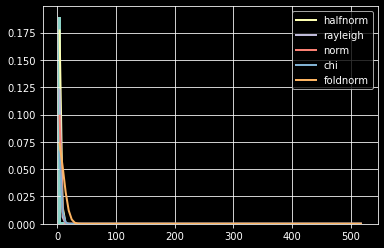

In [85]:
f = Fitter(data=data.values)
f.fit()
f.summary()

In [110]:
f.get_best(method='sumsquare_error')

{'halfnorm': (0.999999999437237, 3.3289457211368303)}

In [95]:
f.get_best(method='kl_div')

{'rayleigh': (-2.0946774390877483, 3.442789771163416)}

In [133]:
f.get_best(method='aic')

{'uniform': (1.0, 519.0)}

In [134]:
f.get_best(method='bic')

{'halfnorm': (0.999999999437237, 3.3289457211368303)}

In [140]:
distr = halfnorm(0.999999999437237, 3.3289457211368303)

In [141]:
distr.pdf(1)

0.23968085623528548

In [142]:
c = (1-0.9999)/3.32
halfnorm.pdf(c)/3.32

0.24032667483160475